<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2009/09_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Membuat data blob sintetis
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# Inisialisasi dan melatih model K-Means dengan 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)

# Mendapatkan label cluster untuk setiap data
y_kmeans = kmeans.predict(X)

# Mendapatkan posisi centroid
centroids = kmeans.cluster_centers_

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Membuat data moons yang tidak bisa dipisahkan oleh K-Means
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Menggunakan DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X) # DBSCAN tidak memiliki metode predict, hanya fit

DBSCAN(eps=0.2)

In [4]:
from sklearn.mixture import GaussianMixture

# Melatih model GMM
gmm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm.fit(X)

# Melihat parameter model yang telah dipelajari
gmm.weights_, gmm.means_, gmm.covariances_

(array([0.58665595, 0.21043353, 0.20291052]),
 array([[ 0.49067581,  0.2579044 ],
        [ 1.72666283, -0.07241745],
        [-0.74886394,  0.5549146 ]]),
 array([[[ 0.1633683 , -0.09679743],
         [-0.09679743,  0.28719319]],
 
        [[ 0.06282163,  0.06680095],
         [ 0.06680095,  0.08831191]],
 
        [[ 0.05311309,  0.06174985],
         [ 0.06174985,  0.08971553]]]))

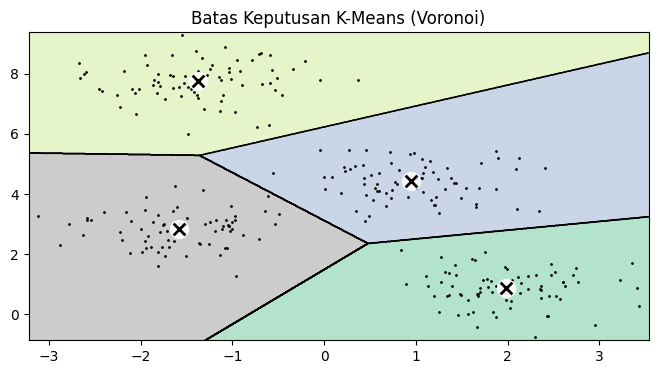

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Membuat data dan melatih model
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)

# Fungsi untuk plot batas keputusan K-Means
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

# Plotting
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title("Batas Keputusan K-Means (Voronoi)")
plt.show()

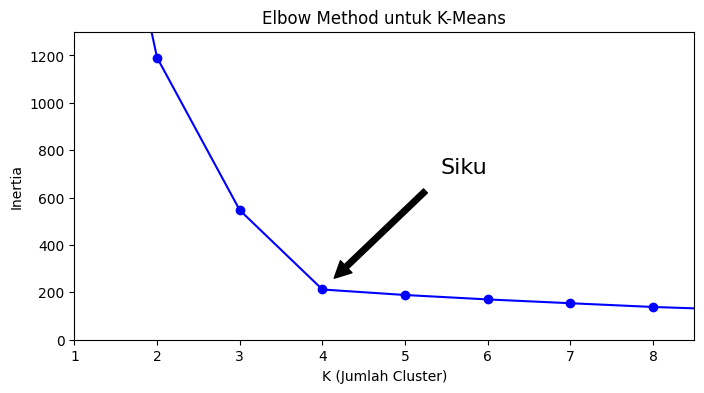

In [6]:
# Menghitung inertia untuk K dari 1 sampai 9
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("K (Jumlah Cluster)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk K-Means")
plt.annotate('Siku',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

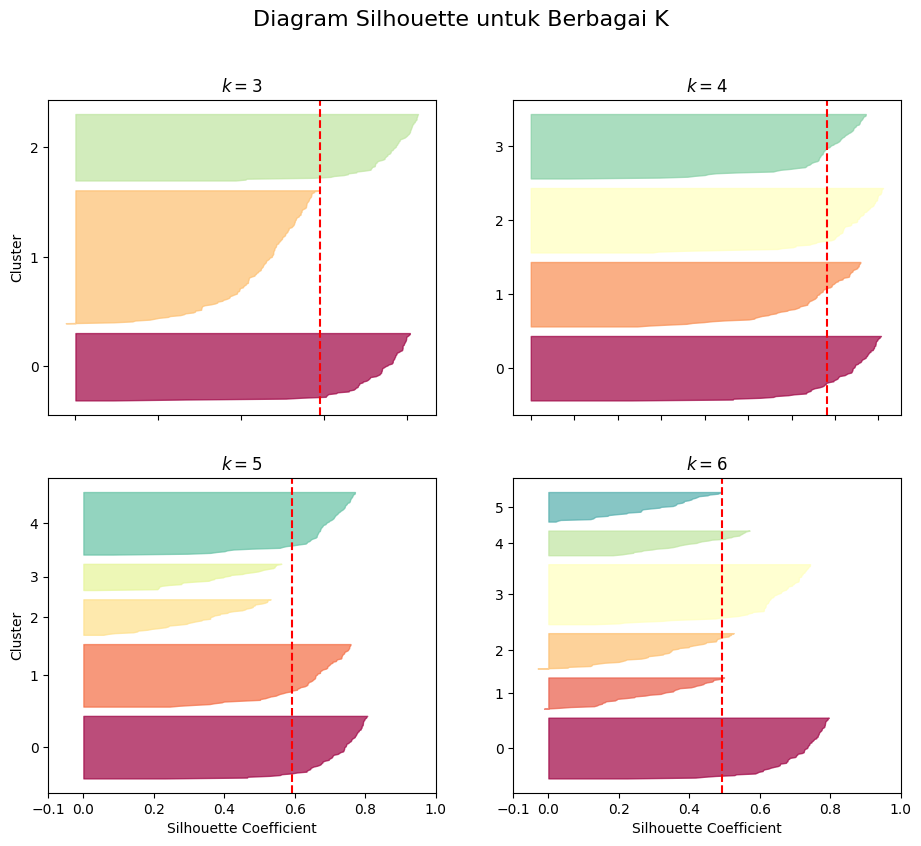

In [7]:
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_score(X, y_pred), color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.suptitle("Diagram Silhouette untuk Berbagai K", fontsize=16)
plt.show()

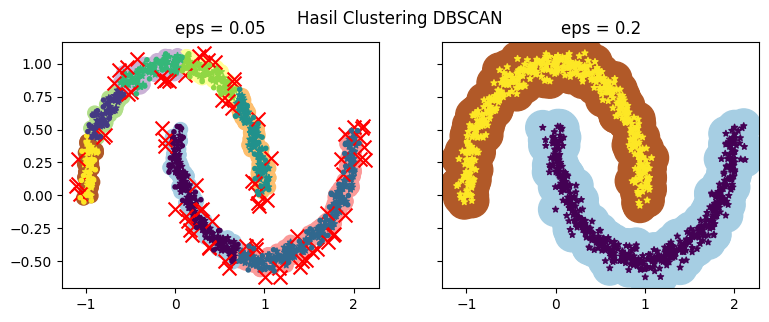

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
dbscan2.fit(X)

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1],
                marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")

fig, axes = plt.subplots(1, 2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_dbscan(dbscan, X, size=100)
plt.title("eps = 0.05")
plt.sca(axes[1])
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.title("eps = 0.2")
plt.suptitle("Hasil Clustering DBSCAN")
plt.show()

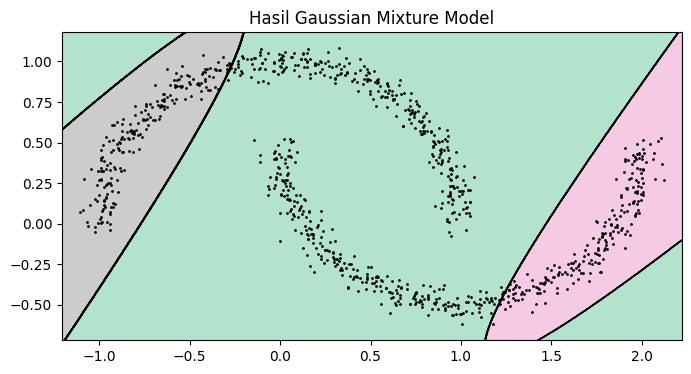

In [9]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm.fit(X)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    Z = clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                levels=np.logspace(0, 20, 15), cmap="jet")

    plot_data(X)

# Plotting
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gmm, X)
plt.title("Hasil Gaussian Mixture Model")
plt.show()

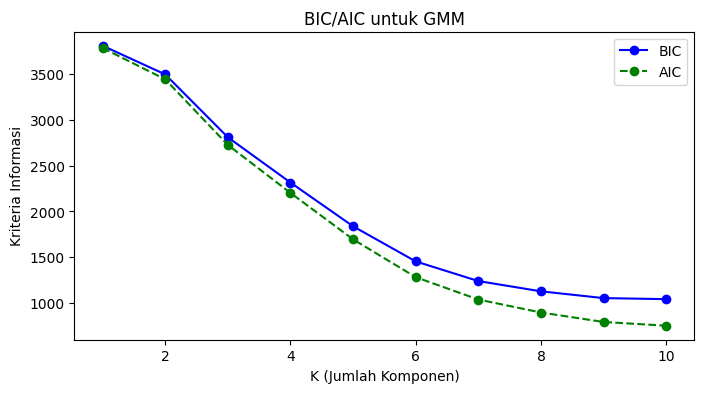

In [10]:
# Menghitung BIC dan AIC untuk berbagai K
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("K (Jumlah Komponen)")
plt.ylabel("Kriteria Informasi")
plt.legend()
plt.title("BIC/AIC untuk GMM")
plt.show()